# Artificial neural networks
Here we will introduce artificial neural networks (ANNs), a corner stone method in Artificial Intelligence. We start with a discussion on the function of natural brains, and their relation to ANNs. Then we will explain a simple ANN model, the perceptron, which you will train on petridish tasks. Subsequently, we will explain how bigger neural networks, multi-layer perceptrons, are trained with backpropagation. You will implement your own algorithm for backpropagation and apply it to a more difficult task. You can then compare the performance of your implementation with a standard Python package for neural network learning.

## Natural brains
What is the function of our brains? Of course, as humans we use our brains for a high versatility of functions, from reading to dreaming or controlling your actions in traffic. In order to get to the primordial function of the brain, though, it is informative to look at the smallest of animals, and look at which point a brain evolved [1]. 

Namely, the smallest of animals do not use brains! Below you see an <em>Escherichia Coli</em> (E. Coli). It is a bacterium of size $1\times3 \mu m$ that lives in other animals' intestins. In order to survive, it needs a number of chemical resources, among which glucose. It can sense glucose with receptor molecules at the front. When the glucose concentration increases, the E. Coli keeps moving straight. However, when the glucose concentration drops, chemical diffusion processes in the bacterium will result in a tumbling behavior. After the tumble, the E. Coli will move forward again. As a result of alternating these two behaviors, the E. Coli will eventually move up the glucose gradient, which in its viscuous and slowly moving environment is enough to feed on the glucose.  

<table>
    <tr>
        <td><img src="E_coli.jpg" alt="E. Coli" width="100%"/></td>
        <td><img src="E_coli_up_gradient.jpg" alt="E. Coli goes up gradient" width="60%"/></td>
    </tr>
</table>
<center>
    <I>Left:</I> Image by Alissa Eckert – public domain. <I>Right:</I> Figure from [3].
</center><BR>


A much larger animal is the $350 \times 50 \mu m$ unicellular <em>Paramecium</em> (see below). It moves quicker than E. Coli, covering larger distances over its lifetime. While looking for food, it needs to avoid obstacles and predators. For this reason, it has an avoidance response. When its front bumps into an obstacle, ion channels open, leading to a quick depolarization of the membrane. As a consequence of the depolarization, its hairs will move differently, making the Paramecium back up and travel in a different direction. So, this animal uses electrical charge to guide its actions. Indeed, since chemical diffusion scales with the square of distance, a chemical-based reaction would be much slower than in the E. Coli. Whereas its normal collision reaction is almost instantaneous, it would take 40 seconds (!) to exhibit the same avoidance reaction with chemical diffusion. 

<table>
    <tr>
        <td><img src="Paramecium.jpg" alt="Paramecium." width="100%"/></td>
        <td><img src="Paramecium_bump.jpg" alt="Paramecium reaction to a collision." width="45%"/></td>
    </tr>
</table>
<center>
    <I>Left:</I> By Barfooz, CC BY-SA 3.0, Wikipedia. <I>Right:</I> From [4].
</center><BR>

Although the Paramecium already uses electrical signals, we have to further scale up to a larger, multicellular animal to observe a brain. The <em>Caenorhabditis elegans</em> (C. Elegans) is a $1 \times 0.1 mm$ worm that has a brain of 302 neurons out of a total of 959 cells. It uses its nervous system for quicker communication, for example for locomotion. Still, also this animal still relies heavily on chemistry, for instance for <em>neuromodulation</em>, i.e., changing the function of a neuron depending on the distribution of chemical substances.   

<table>
    <tr>
        <td><img src="Elegans.gif" alt="C. Elegans." width="100%"/></td>
        <td><img src="Elegans_brain.png" alt="Neurons of the C. Elegans highlighted." width="100%"/></td>
    </tr>
</table>
<center>
    <I>Left:</I> By Bob Goldstein - CC BY-SA 3.0, Wikipedia. <I>Right:</I> Adapted from <A HREF="https://www.sfu.ca/biology/faculty/hutter/hutterlab/research/Ce_nervous_system.html" TARGET="_blank">Simon Fraser University</A>.
</center><BR>    
    


Higher order animals have many more neurons, for example 100,000 neurons for the fruit fly and $\approx 86$ Billion neurons for humans. There is a large variety in the types of neurons and each neuron is itself a complex dynamic system, which is subject not only to electrical but also chemical influences. A single neuron can perform very complex functions, in part because of its shape (morphology). As we will see, artificial neurons are a very abstract model of natural neurons. 

<CENTER>
<img src="morphology_neuron.png" alt="The shape of a neuron has a large influence on its (complex) function." width="40%"/></CENTER><BR>
    <CENTER>
By BruceBlaus - CC BY 3.0, Wikipedia
    </CENTER><BR>
    

## Artificial neurons
The first artificial network was introduced by McCulloch and Pitts (1943) [2], and it was called the <em>perceptron</em>. The perceptron received multiple inputs, including a constant, also called <em>bias</em>. Each input is multiplied with a weight and then summed. The output of the neuron $o$ is then determined by feeding the weighted sum to a step activation function.

<img src="perceptron.png" alt="Perceptron neural network."/>
<CENTER>Image from <A HREF="https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53" TARGET="_blank">towards data science.</A><BR>

The perceptron could be used to perform binary classification problems. Below we show an example of such a problem, where red circles stand for $o = 0$ (lower than the threshold) and green crosses for $o = 1$ (higher than the threshold). 

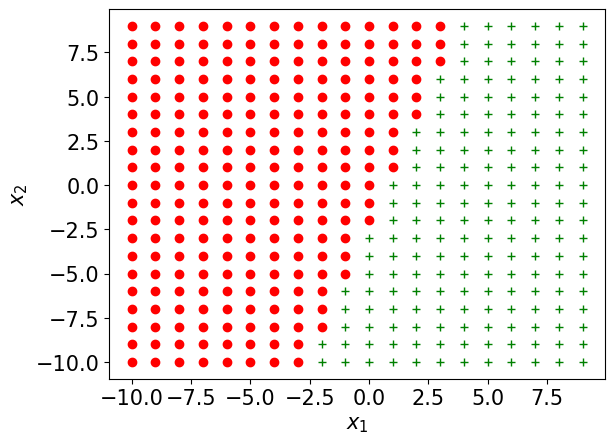

In [7]:
import perceptron

perceptron.draw_simple_problem()

### Exercise 1
<OL>
<LI>Use the following code block to try and reproduce the targets above, by varying `w1`, `w2` and `threshold`. Note that the bias is zero here.
</LI>
<LI>What is your strategy?
</LI>

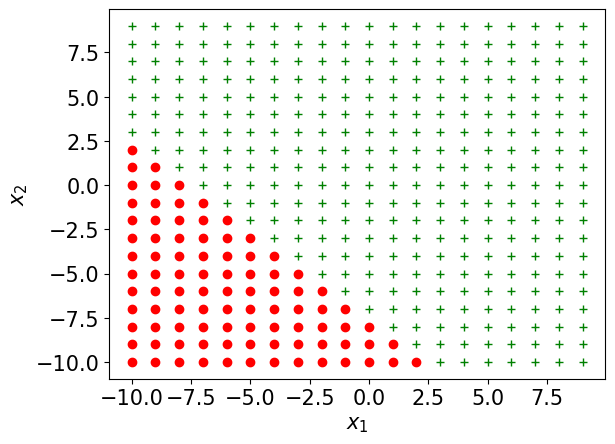

In [8]:
w1 = 1
w2 = 1
threshold = -8

perceptron.draw_linear_func(w1, w2, threshold)

Now we will approach the problem differently. We will give you the inputs `x1`, `x2`, and targets `t` for a new function. You now have to invent and write a function that will <em>automatically</em> guess the right parameters of the function $y  = (w_1 x_1 + w_2  x_2) > T$, where $T=0$ is the threshold. 

### Exercise 2
<OL>
    <LI>Write an algorithm that automatically determines the right parameters given the data.<BR> <em>Hint 1:</em> Think of what direction the weights should change when the output is lower than or higher than the target value. <BR> <em>Hint 2:</em> Use the error over the entire data set, $\sum_{i} (t_i - o_i)$, to see if your algorithm improves the error. </LI>
    <LI>What is the strategy behind your algorithm?</LI>
</OL>


In [9]:
import perceptron

# get the dataset:
[x1, x2, t] = perceptron.get_simple_data()

# print 10 labeled samples. For t[i], False means 0 and True means 1:
for i in range(10):
    print(f'x1 = {x1[i]}, x2 = {x2[i]}, t = {t[i]}')

# starting parameters:
w1 = 0
w2 = 3
threshold = 0 # the threshold is 0, so this parameter does not have to be learned

# intuitive algorithm:

# ... to be filled in by the student ...


x1 = [-4.31525363], x2 = [-2.97473508], t = [1]
x1 = [1.00809004], x2 = [3.80604767], t = [0]
x1 = [-5.66407399], x2 = [-2.97744701], t = [1]
x1 = [-0.0652944], x2 = [9.03351505], t = [0]
x1 = [5.37918042], x2 = [5.8220797], t = [0]
x1 = [9.78174607], x2 = [-0.06701695], t = [0]
x1 = [-4.34139406], x2 = [4.78598415], t = [0]
x1 = [-5.69131807], x2 = [3.57926135], t = [1]
x1 = [0.34037341], x2 = [0.76263094], t = [0]
x1 = [-1.34126512], x2 = [0.58257245], t = [1]


When you have found an algorithm that you think works, you can print the solution and plot the perceptron decision line ($y=0$) with the following functions:

w1=0, w2  = 3, T = 0


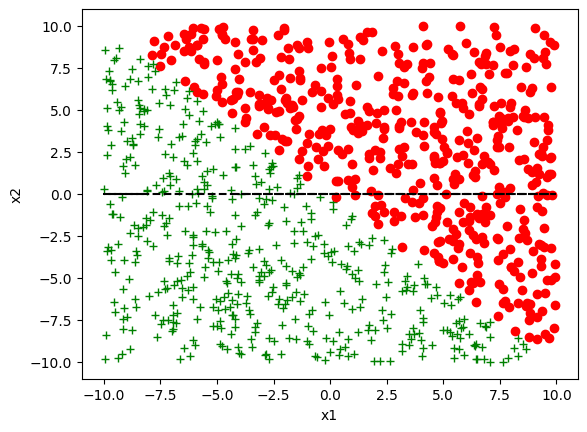

In [10]:
# print the parameters 
print(f'w1={w1}, w2  = {w2}, T = {threshold}')
# plot the data along with the perceptron decision line:
perceptron.plot_data_line(x1, x2, t, w1, w2)

## The delta learning rule
One of the earliest learning rules was the 'delta' learning rule. It is based on the intuition that we want to adjust the weights a little bit in the direction that will reduce the error. Specifically, the delta learning rule is a <em>gradient</em>-based method, in which a <em>loss</em> function is reduced by making small steps down-gradient. 

Let us assume the following squared loss function:

$\mathcal{L} = (o-t)^2$

Then, we want to know the gradient of $\mathcal{L}$ with respect to the weights $w_i$. We have the following functions that determine the neuron's output:

$o = g(a)$

$a = \sum_i w_i x_i$

This leads to the following gradient:

$\frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial o}\frac{\partial o}{\partial a}\frac{\partial a}{\partial w_i}$

$\frac{\partial L}{\partial w_i} = 2(o-t) g'(a) x_i$

The gradient $\frac{\partial L}{\partial w_i}$ indicates what will happen to the loss function when we increase the weight. If the gradient is positive, we need to decrease the weight. If it is negative, we need to increase the weight. Hence, we need to make a step in the negative gradient direction. When processing a single sample $\mathbf{x}$, we can update the weight $w_i$ as follows:

$w_{i, t+1} = w_{i, t} - \alpha (o-t) g'(a) x_i$

The $\alpha$ is called the <em>learning rate</em>, and determines how big the change to the weight will be. How different is this learning rule from the one you made yourself in exercise 2?

The weight update formula contains the derivative of the <em>activation funciton</em>, $g'(a)$. The update is only valid for differentiable functions. For classification problems, the following <em>sigmoid</em> activation function is a popular, differentiable approximation of the step function:

$g(a) = \frac{1}{1+e^{-a}}$

Differentiating with respect to $a$ gives:

$\frac{\partial}{\partial a}  g(a) = \frac{\partial}{\partial a} (1+e^{-a})^{-1} = e^{-a} (1+e^{-a})^{-2}$

$\frac{\partial}{\partial a}  g(a) = \frac{e^{-a}}{(1+e^{-a})^2} = \frac{1}{1+e^{-a}} \left( \frac{1 + e^{-a} - 1}{1+e^{-a}} \right) = \frac{1}{1+e^{-a}} \left( 1 - \frac{1}{1+e^{-a}} \right) = g(a) (1-g(a))$

<!-- https://hausetutorials.netlify.app/posts/2019-12-01-neural-networks-deriving-the-sigmoid-derivative/#:~:text=The%20derivative%20of%20the%20sigmoid%20function%20%CF%83(x)%20is%20the,1%E2%88%92%CF%83(x).  -->

We plot both the sigmoid function, often represented as $\sigma(a)$, and its derivative below.

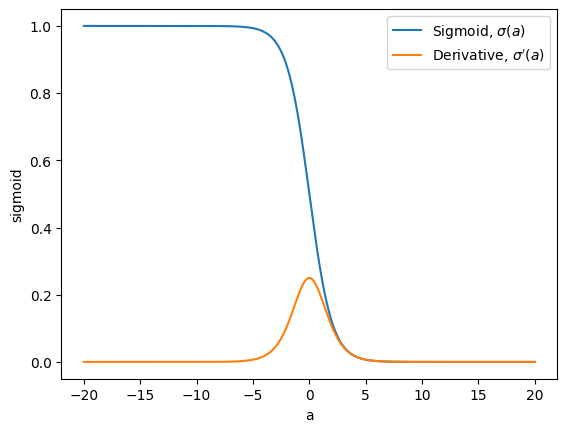

In [1]:
import numpy as np
from matplotlib import pyplot as plt

a = np.arange(-20, 20, 0.01)
sigm = 1 / (1 + np.exp(a))

derivative = sigm * (1 - sigm)

plt.figure()
plt.plot(a, sigm)
plt.plot(a, derivative)
plt.xlabel('a')
plt.ylabel('sigmoid')
plt.legend(['Sigmoid, $\sigma(a)$', "Derivative, $\sigma'(a)$"])
plt.show()

### Exercise 3
<OL>
    <LI>Implement the delta rule to automatically learn the weights. Develop and test it with the simple data set using get_simple_data().</LI>
    <LI>When you have succeeded the implementation, try it out on a more difficult problem. You can do this by uncommenting the get_difficult_data() line. Can you get it to work? How?</LI>
</OL>

In [6]:
import perceptron

def sigmoid(a):
    return 1 / (1 + np.exp(-a))

# get the dataset:
[x1, x2, t] = perceptron.get_simple_data()
#[x1, x2, t] = perceptron.get_difficult_data()

# starting parameters:
w1 = 0
w2 = 3
threshold = 0 # the threshold is 0, so this parameter does not have to be learned

# delta rule:
n_iterations = 10
n_samples = len(x1)
learning_rate = 0.01

for i in range(n_iterations):
    print(f'Iteration {i}')
    sum_err = 0
    
    for j in range(n_samples):
        # calculate output, gradient, and error:
        y = w1 * x1[j] + w2 * x2[j]
        y = sigmoid(y)
        
        error = (t[j]-y)**2
        gradient = ... # to be filled in 
        
        # update weights:
        w1 -= learning_rate * gradient
        w2 -= learning_rate * gradient
        
        # keep track of the loss:
        sum_err += error
        
    print(f'Sum error = {sum_err}')

print(f'w1={w1}, w2  = {w2}, T = {threshold}')
# plot the data and the separation line:
perceptron.plot_data_line(x1, x2, t, w1, w2)

Iteration 0


TypeError: unsupported operand type(s) for *: 'float' and 'ellipsis'

### Learning as parameter optimization
The delta learning rule searches for the optimal weights in the weight parameter space. For the simple and low-dimensional problem and perceptron studied here, we can directly show what the error surface looks like. The below code implements and runs the delta learning rule. After learning, it plots the trajectory of the weights during learning, with a red star as the starting point and a green dot as the end point. 

What happens when you change the learning rate?  For example, try out values of $0.001$, $0.01$, $0.05$, $0.5$, and $10$.

Learning.
w1=-4.541689790568295, w2  = -4.658667580730909, T = 0


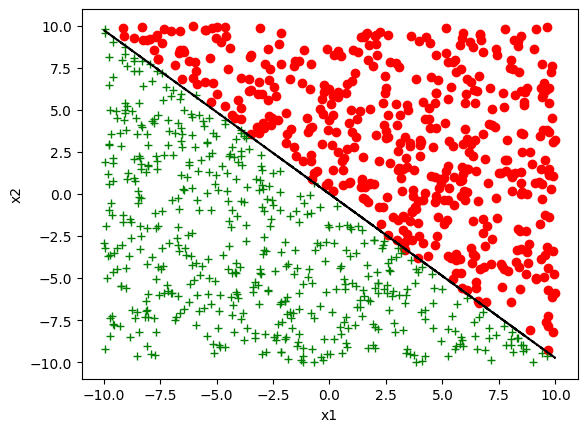

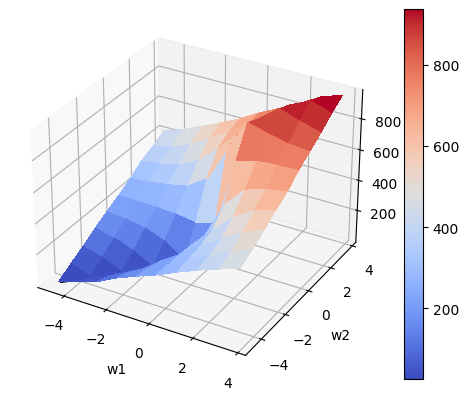

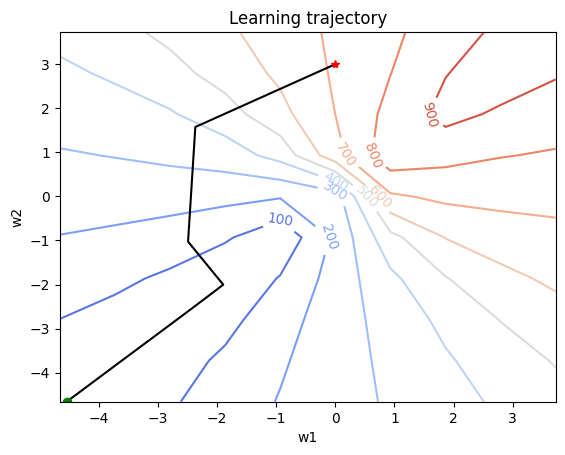

In [3]:
import perceptron
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

def sigmoid(a):
    return 1 / (1 + np.exp(-a))

# get the dataset:
[x1, x2, t] = perceptron.get_simple_data()

# starting parameters:
w1 = 0
w2 = 3
threshold = 0

# delta rule:
n_iterations = 100
n_samples = len(x1)
learning_rate = 0.05

Hist = np.zeros([n_iterations, 3])

print('Learning.')
for i in range(n_iterations):

    #print(f'Iteration {i}')
    sum_err = 0

    for j in range(n_samples):
        # calculate output, gradient, and error:
        y = w1 * x1[j] + w2 * x2[j]
        y = sigmoid(y)
        y = y[0]

        gradient = y * (1 - y)

        error = y - t[j][0]

        # update weights:
        if(i != 0):
            w1 -= learning_rate * gradient * error * x1[j][0]
            w2 -= learning_rate * gradient * error * x2[j][0]

        # keep track of the loss:
        sum_err += error*error

    #print(f'Sum error = {sum_err}')
    Hist[i,:] = [w1, w2, sum_err]


print(f'w1={w1}, w2  = {w2}, T = {threshold}')
# plot the data and the separation line:
plt.figure()
perceptron.plot_data_line(x1, x2, t, w1, w2)

# plot trajectory on error surface:
v = Hist[:,0:2].flatten()
limit = np.max(np.abs(v)) 
step = 2*limit / 10
w1_range = np.arange(-limit, limit, step)
w2_range = np.arange(-limit, limit, step)
N = len(w1_range)
E = np.zeros([N,N])
X = np.zeros([N,N])
Y = np.zeros([N,N])
for i1, w1 in enumerate(w1_range):
    for i2, w2 in enumerate(w2_range):
        sum_error = 0
        for j in range(n_samples):
            # calculate output, gradient, and error:
            y = w1 * x1[j] + w2 * x2[j]
            y = sigmoid(y)
            sum_error += (y-t[j])*(y-t[j])
        E[i1, i2] = sum_error
        X[i1, i2] = w1
        Y[i1, i2] = w2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, E, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf) # , shrink=0.5, aspect=5
plt.plot(Hist[:,0], Hist[:,1], Hist[:,2] + 2, 'k-')
plt.xlabel('w1')
plt.ylabel('w2')
ax.set_zlabel('Error', rotation = 0)
plt.show()


fig, ax = plt.subplots()
CS = ax.contour(X, Y, E, levels = 10, cmap=cm.coolwarm)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Learning trajectory')
plt.plot(Hist[:,0], Hist[:,1], 'k-')
plt.plot(Hist[0,0], Hist[0,1], 'r*')
plt.plot(Hist[-1,0], Hist[-1,1], 'go')
plt.xlabel('w1')
plt.ylabel('w2')
plt.show()

## Backpropagation

Exercise 3 contained a difficult dataset, which was very hard to learn with the delta learning rule. You may have realized that it was not the fault of the learning rule, but of the perceptron; It can only learn linearly separable functions! This limitation and others were discussed in Minsky and Papert's 1969 book "Perceptrons: an introduction to computational geometry" [3]. The discussion in the book was an important factor leading to the first disappointment in AI, leading to the first 'AI winter'.

Later it was found that more complex functions could be tackled by adding an additional layer to the neural network. A network with an input, hidden, and output layer is called a <em>multi-layer perceptrons</em> (MLP). The image below shows an example MLP. It has been proven that MLPs are universal function approximators; Given sufficient hidden neurons, they can approximate any continuous function! This property of MLPs (cf. [4 - Hornik]) is highly promising, since it ensures that even though a given function of interest may be unknown and complicated, an MLP will be able to approximate it very well. There are a few caveats to the proof, though. First, the number of hidden neurons required may be very large. Second, as stated, the proofs concern continuous approximations of functions, so the fit will be less good for functions with discontinuities. If you want to develop some intuition for this proof, I advise you to read and experiment on <A HREF="http://neuralnetworksanddeeplearning.com/chap4.html" TARGET="_blank">this blog</A>, written by Michael Nielsen.

<IMG SRC="MLP.png"></IMG>

Training an MLP is more involved than training a perceptron, as it is not immediately clear how a weight from an input to a hidden neuron should change in order to get closer to the desired target output. The dominant approach to training MLPs has a very similar basis as the delta learning rule; <em>Backpropagation</em> makes use of the <A HREF="https://en.wikipedia.org/wiki/Chain_rule" TARGET="_blank">chain rule</A> for differentiation to propagate the errors back to all the weights in the network.

Training then proceeds by first propagating inputs forward through the network to calculate the network outputs. The outputs result in a loss that is backpropagated to the network weights. Let us suppose the following loss function:

$\mathcal{L} = \frac{1}{2} (o - t)^2$

Then the derivative with respect to the output is:

$\frac{\partial \mathcal{L}}{ \partial o }  = (o-t)$

And the derivative with respect to the output neuron's activation is, given a sigmoid activation function:

$\frac{\partial \mathcal{L}}{ \partial o } \frac{\partial o}{ \partial a } = (o-t) o (1-o)$

The derivative  with respect to the weights between the hidden and output layer are then:

$\frac{\partial \mathcal{L}}{ \partial w_{h} } = \frac{\partial \mathcal{L}}{ \partial o } \frac{\partial o}{ \partial a } \frac{\partial a}{ \partial w_{h} }$

, where $\frac{\partial a}{ \partial w_{h} } = h_h$, the activity of hidden neuron $h$. In order to calculate the derivative with respect to the weights in the first layer, we can first calculate:

$\frac{\partial \mathcal{L}}{ \partial h_{h} } = \frac{\partial \mathcal{L}}{ \partial o } \frac{\partial o}{ \partial a } \frac{\partial a}{ \partial h_{h} }$

, where $\frac{\partial a}{ \partial h_{h} } = w_h$. To determine the gradient to the weight in between the input and hidden layer, we still need:

$\frac{\partial \mathcal{L}}{ \partial w_{i} } = \frac{\partial \mathcal{L}}{ \partial o } \frac{\partial o}{ \partial a } \frac{\partial a}{ \partial h_{h} } \frac{\partial h_h}{ \partial a_h} \frac{\partial a_h}{ \partial w_i}$

, where $\frac{\partial h_h}{ \partial w_i} = i_i$.

The gradient can subsequently be used for updating the weights.

### Exercise 4 - additional.
<B>Note:</B> This exercise will allow you to understand backpropagation very well, but may take considerable time. Feel free to skip it and go to exercise 5.

<OL>
    <LI>The code below loads a dataset. Write all code necessary to initialize an MLP, run it on data samples, and adjust the weights with the help of backpropagation. Can your code solve the difficult data problem?</LI>
</OL>

In [4]:
import perceptron
import numpy as np
from matplotlib import pyplot as plt

# get the dataset:
#[x1, x2, t] = perceptron.get_simple_data()
[x1, x2, t] = perceptron.get_medium_data()
#[x1, x2, t] = perceptron.get_difficult_data()
#[x1, x2, t] = perceptron.get_traditional_XOR_data()

# implement MLP with backprop

## Stochastic gradient descent

The gradients determined in backpropagation can be used in different ways for updating the weights. One major approach to MLP learning is <A HREF="https://en.wikipedia.org/wiki/Stochastic_gradient_descent" TARGET="_blank">"stochastic gradient descent" (SGD)</A>. Instead of adjusting the weights based on the entire training set, SGD does so based on a subset of the data - called a <I>batch</I>. In order to pass the full training dataset through the neural network, i.e., perform an <I>epoch</I>, a certain number of <I>iterations</I> is required. If $N$ is the training data set size and $B$ is the batch size, then the number of iterations is $I = \frac{N}{B}$. One can also select random samples every time a batch is sampled, in which case learning has multiple iterations, but the definition of epochs is less relevant. In any case, selecting a random batch makes the gradient determination stochastic. 

The most elementary version of SGD gets a single sample from the batch, performs a forward pass of the activations through the network, a backward pass in order to calculate the gradients, and immediately updates the weights. Consequently, the weights are changing between samples in the batch. Instead, most implementations of SGD calculate and accumulate the gradients for all the samples in the batch, and update the weights only after all samples in the batch have been processed - aiming for smoother optimization. 

### Exercise 5
<OL>
    <LI> Below you find a straightforward implementation of SGD for training an MLP. Tune the three learning parameters, n_iterations, batch_size, and learning_rate so that the learning works. <B>Advice:</B> If you have difficulties to do it on the difficult data, start with the simple of medium data set.
    </LI>
</OL>


Iteration 0
Sum error = 0.2402255010044291
Sum error = 0.4772112725852387
Sum error = 0.2618962320526959
Sum error = 0.19414451886710887
Sum error = 0.13241316225016986
Sum error = 0.12202182294366504
Sum error = 0.45777428260467284
Sum error = 0.1223315042126822
Sum error = 0.14432554308933052
Sum error = 0.21994811591919944
Iteration 10
Sum error = 0.2811083140175537
Sum error = 0.39333984781218456
Sum error = 0.39426109708957086
Sum error = 0.4062297818230894
Sum error = 0.06802120319847374
Sum error = 0.4564586584585425
Sum error = 0.08105495630184946
Sum error = 0.5613748609669211
Sum error = 0.03444227622912897
Sum error = 0.0023260717844613083
Iteration 20
Sum error = 0.007052518738531001
Sum error = 0.09904941816449292
Sum error = 0.28903040384801376
Sum error = 0.25416597853837564
Sum error = 0.516434057413646
Sum error = 0.34555027949948014
Sum error = 0.3956829672879997
Sum error = 0.435002875563148
Sum error = 0.1813915720003399
Sum error = 0.29275716233698135
Iteration 30


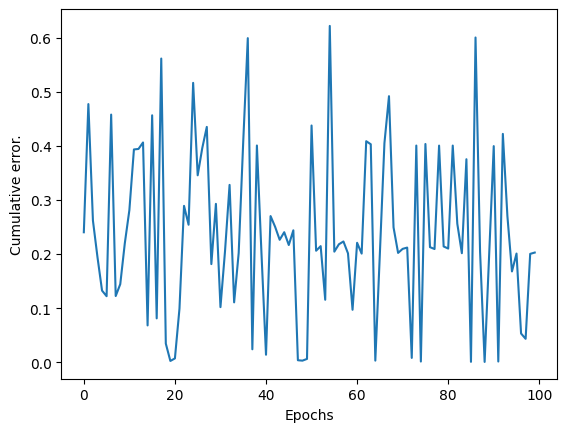

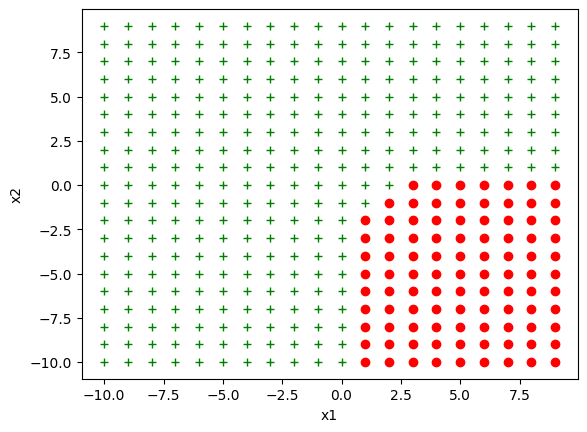

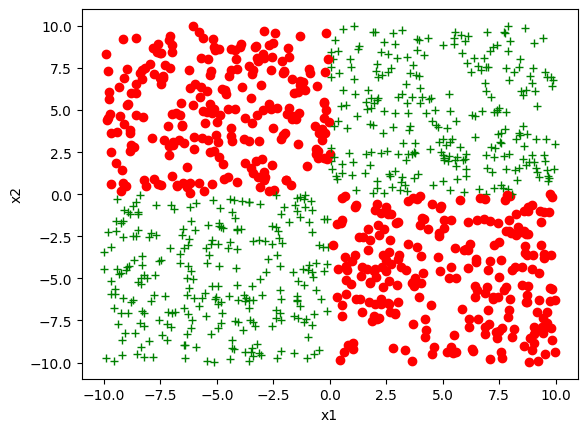

In [6]:
import perceptron
import numpy as np
from matplotlib import pyplot as plt

# get the dataset:
#[x1, x2, t] = perceptron.get_simple_data()
#[x1, x2, t] = perceptron.get_medium_data()
[x1, x2, t] = perceptron.get_difficult_data()
#[x1, x2, t] = perceptron.get_traditional_XOR_data()

# Tune the learning parameters:
n_iterations = 100
batch_size = 5
learning_rate = 1.0


# create the weights for an MLP:
n_hidden_neurons = 20
np.random.seed(1)
bound_ih = 0.5
bound_ho = 1 / n_hidden_neurons
w_ih = bound_ih*2*(np.random.random([3,n_hidden_neurons])-0.5)
w_ho = bound_ho*2*(np.random.random([n_hidden_neurons+1, 1])-0.5)

inputs = np.ones([1,3])

n_samples = len(x1)
batch_size = np.min([batch_size, n_samples])
sum_errs = np.zeros([n_iterations, 1])

Weights = []

for i in range(n_iterations):

    if(i % (n_iterations/10) == 0):
        print(f'Iteration {i}')

    sum_err = 0

    samples = np.random.choice(n_samples, size=batch_size, replace = False)

    d_w_ho = 0
    d_w_ih = 0

    for j in samples:
        # calculate output and hidden neuron activations:
        inputs[0,0:2] = [x1[j][0], x2[j][0]]
        [h,o] = perceptron.get_output_MLP(w_ih, w_ho, inputs)

        # calculate the gradients:
        error = o - t[j]

        gradient_ho = np.transpose(error * o * (1-o) * h)
        
        gradient_ih = error * o * (1-o) * w_ho * np.transpose(h) * (1-np.transpose(h))
        gradient_ih = np.transpose(np.multiply(inputs, gradient_ih))
        gradient_ih = gradient_ih[:,:-1]

        # accumulate gradients:
        d_w_ho += learning_rate * gradient_ho
        d_w_ih += learning_rate * gradient_ih

        # keep track of the loss:
        sum_err += error*error

    # Perform the weight update:
    w_ho -= d_w_ho
    w_ih -= d_w_ih

    Weights.append((np.copy(w_ho), np.copy(w_ih)))

    sum_errs[i] = sum_err / batch_size
    print(f'Sum error = {sum_errs[i][0]}')

plt.figure()
plt.plot(sum_errs)
plt.xlabel('Epochs')
plt.ylabel('Cumulative error.')
    
# draw the output:
perceptron.draw_MLP(w_ih, w_ho, threshold = 0.5)

# draw how it should be:
perceptron.plot_data(x1, x2, t)

## PyTorch

Above, we have implemented the delta rule and backpropagation algorithms for small neural networks using general libraries like numpy. Although this is good for learning the basics, designing and training neural networks becomes much easier when using libraries that are specifically designed for it. In this course, we introduce you to <A HREF="https://pytorch.org/" TARGET="_blank">PyTorch</A>. The PyTorch website has many resources, documentation, and tutorials. Here we cover the basics, so that you can start using it for straightforward training of neural networks. 

One of the most important capabilities of the PyTorch packages is that it performs <A HREF="https://en.wikipedia.org/wiki/Automatic_differentiation" TARGET="_blank">automatic differentiation</A> (AD). This means that PyTorch will automatically determine the partial derivatives and gradients needed for performing backpropagation. Consequently, you will not need to manually determine these derivatives, and it is easy to apply backpropagation to more complex neural network structures, and even other types of parameters present in neural networks. 

A central structure in PyTorch is the <A HREF="https://en.wikipedia.org/wiki/Tensor">tensor</A>. From Wikipedia: <I>"In mathematics, a tensor is an algebraic object that describes a multilinear relationship between sets of algebraic objects related to a vector space."</I> You may (or may not) know tensors from physics. For all practical means concerning neural network training, you can see tensors as multidimensional arrays. In the examples and exercises we have covered until now, we have encountered vector inputs, weights, and scalar outputs. However, inputs can just as well be 2- or 3-dimensional (or even higher), also requiring higher-dimensional weight tensors.   

PyTorch is imported with `import torch`. After that, it is often used in a way similar to numpy. For instance, in the code you will study below, we use `torch.linspace` an equivalent to `np.linspace` that outputs a torch tensor instead of a numpy array. The `torch.nn` submodule contains many of the most relevant neural network functions. 

In the code below, we create an elementary feedforward neural network. We do this by making an object `model` of the class `torch.nn.Sequential`. It will receive inputs $\mathbf{x}$ and then sequentially apply: (1) a linear transformation of the form $\mathbf{a} = W^{T}\mathbf{x} + \mathbf{b}$. Then it will apply a sigmoid function to $\mathbf{a}$: $\mathbf{h}= \sigma(\mathbf{a})$. Finally, it will again apply a linear transformation: $\mathbf{o}= W^{T}\mathbf{h}$. Hence, `model` is a simple feedforward MLP with sigmoid activations in the hidden layer and a linear activation function in the output layer. The `torch.nn` submodule also contains various loss functions. Below, we use the elementary mean squared error loss (also used in the examples above), `loss_fn = torch.nn.MSELoss(reduction='sum')`. Moreover, we can select different types of learning methods, called <I>optimizers</I>. Here, we use Stochastic Gradient Descent (SGD): `optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)`. The optimizer gets the parameters of the model (the neural network weights) and the learning rate as input. Finally, the backpropagation commands can use some explanation: (1) `optimizer.zero_grad()` resets the gradients calculated for backpropagation, (2) `loss.backward()` performs the backpropagation, and (3) `optimizer.step()` updates the weights.

### Exercise 6.
<OL>
    <LI>Study the code below, which implements and trains an MLP for an elementary regression problem. How can you change the parameters of the neural network or learning to get better fitting results, e.g., so that the neural network also fits very nicely at the ends of the $x$ interval?</LI>
    <LI>How good of a model is the neural network for this function? Does it generalize well beyond the limits of the training data set?</LI>
</OL>

0 17501.52734375
100 7140.14453125
200 6909.46142578125
300 6560.2685546875
400 6031.80322265625
500 5324.16845703125
600 4499.18212890625
700 3646.923583984375
800 2849.375244140625
900 2163.655517578125
1000 1616.634521484375
1100 1206.0582275390625
1200 910.1470336914062
1300 700.6651000976562
1400 552.1278686523438
1500 445.22991943359375
1600 366.6187438964844
1700 307.4290771484375
1800 261.83160400390625
1900 225.96255493164062
2000 197.21690368652344
2100 173.80288696289062
2200 154.46038818359375
2300 138.28488159179688
2400 124.6130142211914
2500 112.94928741455078
2600 102.91769409179688
2700 94.22730255126953
2800 86.650634765625
2900 80.00691223144531
3000 74.15095520019531
3100 68.9653091430664
3200 64.35347747802734
3300 60.23573684692383
3400 56.54568099975586
3500 53.22774124145508
3600 50.23493957519531
3700 47.52731704711914
3800 45.07088851928711
3900 42.83641815185547
4000 40.79857635498047
4100 38.935611724853516
4200 37.22856140136719
4300 35.66083526611328
4400 

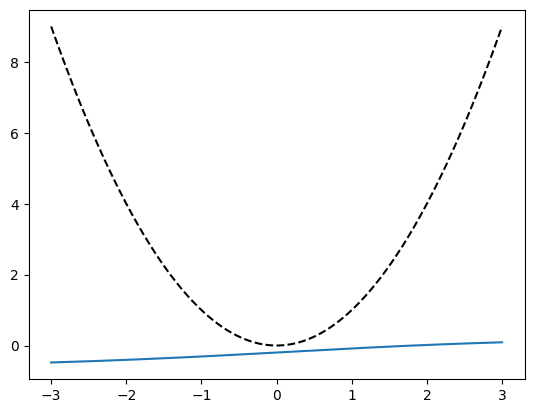

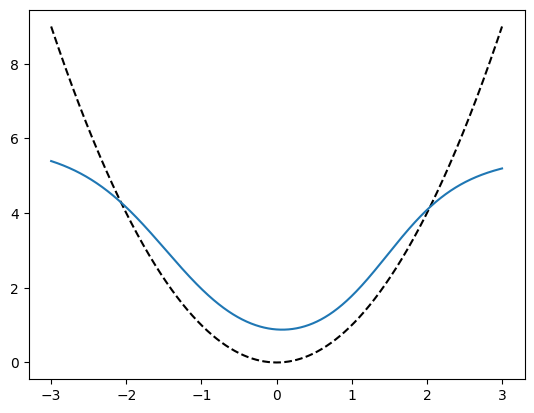

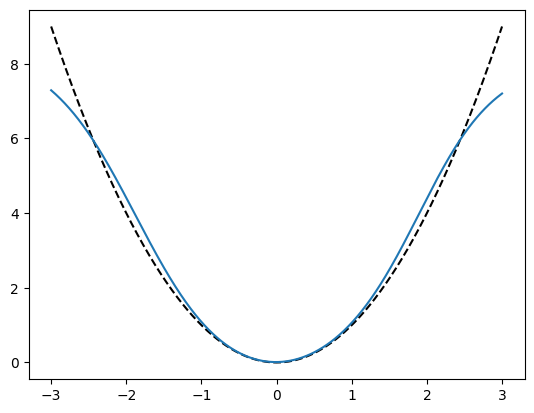

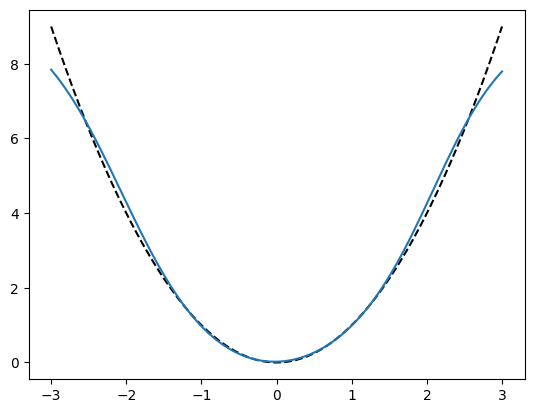

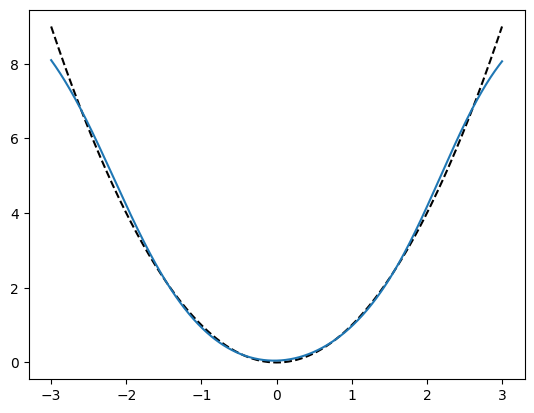

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np

# Create Tensors to hold input and outputs.
limit = 3
n_steps = 1000
x = torch.linspace(-limit, limit, n_steps)
x = torch.reshape(x, (n_steps, 1))
y = x**2


# Make a neural network model for the MLP with sigmoid activation functions in the hidden layer, and linear on the output
n_hidden_neurons = 10
model = torch.nn.Sequential(torch.nn.Linear(1, n_hidden_neurons),
                            torch.nn.Sigmoid(),torch.nn.Linear(n_hidden_neurons, 1))

# We will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-5
# We use stochastic gradient descent for the optimization:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_epochs = 5000

for t in range(n_epochs):

    # Forward pass
    y_pred = model(x)


    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 0:
        print(t, loss.item())

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t % 1000 == 0:
        plt.figure()
        plt.plot(x, y, 'k--')
        plt.plot(x, y_pred.detach().numpy())

### Exercise 7
The cool thing about automatic differentiation is that you can make any kind of neural network or model, and PyTorch will still be able to find the gradients for backpropagation. Please see the code below with a module that has been made for representing a quadratic function.

Please note that here, instead of using the `torch.nn.Sequential` class, we make our own class (for a deeper explanation on classes see the Python reader of AE1205 or online resources such as <A HREF="https://realpython.com/python-classes/" TARGET="_blank">this one</A>). The class is called `Quadratic` (with capital letter, as is the convention for classes). It <i>extends</i> the class `torch.nn.Module`. This means that our class will have all the properties of this <i>parent</i> class. You can think of this relation between Quadratic and Module as the relation between a class `Tesla` that could extend the class `Car`. If the class `Car` has functions (called <i>methods</i>) to drive, refuel / recharge, and report on the status, then so will the `Tesla` class. However, you can change the functions of the Tesla to drive faster or even perform functions that in general cars do not have, like driving autonomously. In our case, we change the initialization method (`def __init__(self):`) to not only initialize all elements of the Module class (with `super().__init__()`), but also add three variables (<i>attributes</i>), $a, b, c$. These will be the parameters for our quadratic function $y = a x^2  + b x + c$. We also define our `forward` function, which takes the inputs ($x$) and in our case outputs the quadratic function output $y$. As you will see in the code below, the only thing we now change is the `model`, which is no longer a `torch.nn.Sequential` object, but a `Quadratic` object: `q_model = Quadratic()`. The rest of the code stays the same. Thanks to the functionality in the `torch.nn.Module` class, PyTorch can automatically determine the gradient used in the optimization step.

<OL>
    <LI>  First train the function. How good is the fit? And the generalization beyond the initial range?
    </LI>
</OL>
    

0 14384.232421875
100 6.230145454406738
200 1.1099762916564941
300 0.1977805644273758
400 0.035241685807704926
500 0.006279653869569302
600 0.0011189241195097566
700 0.00019939681806135923
800 3.5547345760278404e-05
900 6.34031721347128e-06
1000 1.132101829171006e-06
1100 2.022287617364782e-07
1200 3.682447413666523e-08
1300 7.604509910663637e-09
1400 1.764508095192241e-09
1500 5.495205956940197e-10
1600 4.801468111992335e-10
1700 2.926406617032029e-10
1800 2.85346829498323e-10
1900 2.900934492622298e-10
2000 2.900937823291372e-10
2100 2.9009569746385466e-10
2200 2.9009689095360613e-10
2300 2.9010299718024157e-10
2400 2.901042461811443e-10
2500 2.8531332851855495e-10
2600 2.853434155625223e-10
2700 2.853446368078494e-10
2800 2.9009161739423917e-10
2900 2.9009286639514187e-10
3000 2.900950590856155e-10
3100 2.9009619706421574e-10
3200 2.901023032908512e-10
3300 2.901034135138758e-10
3400 2.853127178958914e-10
3500 2.853138003633404e-10
3600 2.8532770590672385e-10
3700 2.853288161297485e

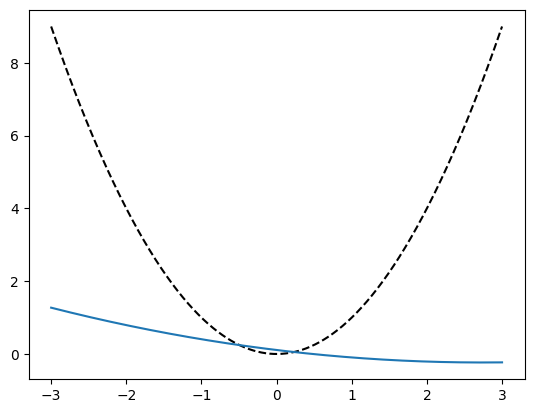

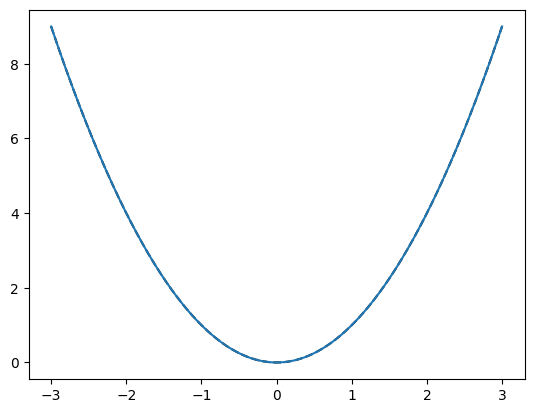

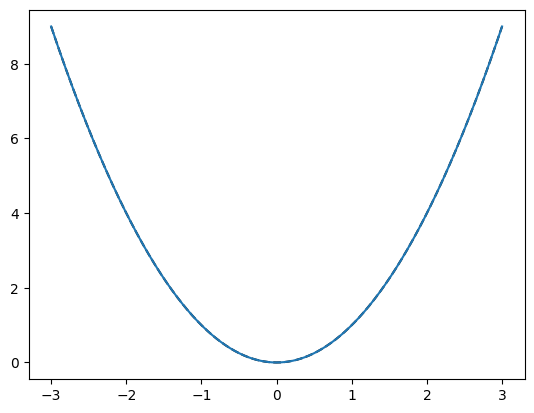

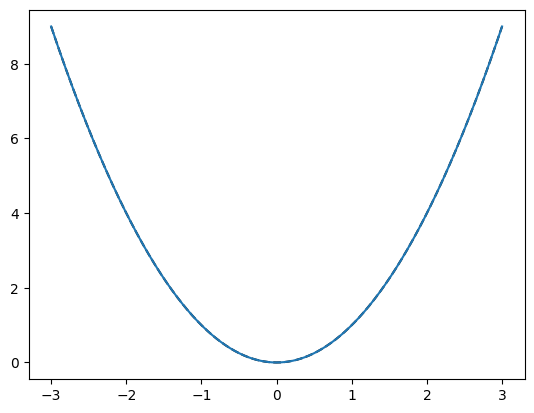

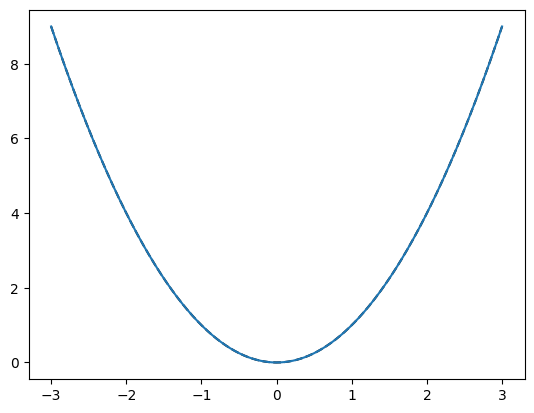

In [8]:
import torch
from torch import Tensor
from matplotlib import pyplot as plt
import numpy as np

# Create Tensors to hold input and outputs.
limit = 3
n_steps = 1000
x = torch.linspace(-limit, limit, n_steps)
x = torch.reshape(x, (n_steps, 1))
y = x**2

# Define a module for a quadratic function:
class Quadratic(torch.nn.Module):
    def __init__(self):
        
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        
        return self.a * x ** 2 + self.b * x + self.c 

q_model = Quadratic()

# We will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-5

optimizer = torch.optim.SGD(q_model.parameters(), lr=learning_rate)

n_epochs = 5000

for t in range(n_epochs):

    # Forward pass
    y_pred = q_model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 0:
        print(t, loss.item())

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t % 1000 == 0:
        plt.figure()
        plt.plot(x, y, 'k--')
        plt.plot(x, y_pred.detach().numpy())

## References

[1] Principles of Neural Design, by Peter Sterling and Simon Laughlin<BR>
[2] McCulloch and Pitts<BR>
[3] Effect of c-di-GMP on biofilm formation and motility of Campylobacter jejun, B. Elgamoudi (2014), 5th ASM Conference on Cell-Cell Communication in Bacteria.<BR>
[4] Hirano, A., Tsuji, T., Takiguchi, N., and Ohtake, H. (2006, October). An electrophysiological model of chemotactic response in Paramecium. In 2006 IEEE International Conference on Systems, Man and Cybernetics (Vol. 5, pp. 3612-3617). IEEE.<BR>
    

## Answers

### Exercise 1

Most likely you will follow an incremental approach, finding the right signs first and then slightly changing until the outputs match the template.

### Exercise 2
<OL>
    <LI>The following code block has example code of an intuitive algorithm.</LI>
    <LI>The reasoning quite literally follows the first hint. If the error is positive (output too low) and the input (either 1 or 2) is positive, then the weight should be increased. If the input is negative, then the weight should be decreased.</LI>
</OL>


x1 = [-3.50792316], x2 = [4.29613756], t = [0]
x1 = [8.67711809], x2 = [-1.67708514], t = [0]
x1 = [3.37848044], x2 = [-8.09267494], t = [1]
x1 = [2.61874706], x2 = [-7.55234766], t = [1]
x1 = [-3.09318707], x2 = [-1.53463509], t = [1]
x1 = [0.82014312], x2 = [-4.91361584], t = [1]
x1 = [-4.82559095], x2 = [7.84119729], t = [0]
x1 = [-9.18478948], x2 = [4.36710736], t = [1]
x1 = [4.45168474], x2 = [0.5023273], t = [0]
x1 = [-6.98171544], x2 = [3.89108635], t = [1]
Iteration 0
Sum error = [338]
Iteration 1
Sum error = [50]
Iteration 2
Sum error = [50]
Iteration 3
Sum error = [50]
Iteration 4
Sum error = [50]
Iteration 5
Sum error = [50]
Iteration 6
Sum error = [50]
Iteration 7
Sum error = [50]
Iteration 8
Sum error = [50]
Iteration 9
Sum error = [50]
Iteration 10
Sum error = [50]
Iteration 11
Sum error = [50]
Iteration 12
Sum error = [50]
Iteration 13
Sum error = [50]
Iteration 14
Sum error = [50]
Iteration 15
Sum error = [50]
Iteration 16
Sum error = [50]
Iteration 17
Sum error = [50]


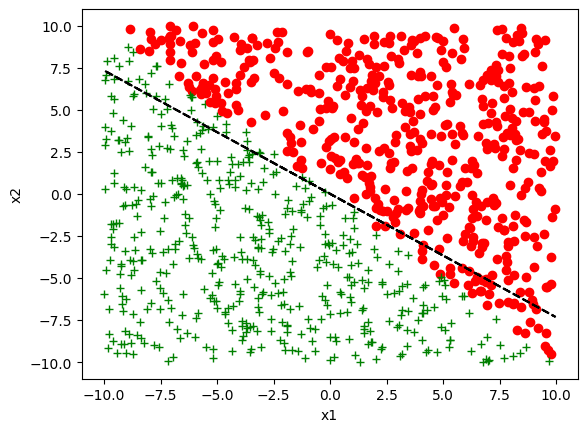

In [9]:
import perceptron

# get the dataset:
[x1, x2, t] = perceptron.get_simple_data()

# print 10 labeled samples. For t[i], False means 0 and True means 1:
for i in range(10):
    print(f'x1 = {x1[i]}, x2 = {x2[i]}, t = {t[i]}')

# starting parameters:
w1 = 0
w2 = 3
threshold = 0 # the threshold is 0, so this parameter does not have to be learned

# intuitive algorithm:

# this is based on the reasoning that if the target is larger than the output (positive error),
# weights for positive inputs should decrease and viceversa.
n_iterations = 100
n_samples = len(x1)
learning_step = 0.01

for i in range(n_iterations):
    print(f'Iteration {i}')
    sum_err = 0
    
    for j in range(n_samples):
        y = w1 * x1[j] + w2 * x2[j]
        y = int(y > threshold)
        error = t[j] - y
        sum_err += error*error
        if(error > 0):
            if(x1[j] >= 0):
                w1 += learning_step
            else:
                w1 -= learning_step
            if(x2[j] >= 0):
                w2 += learning_step
            else:
                w2 -= learning_step
        else:
            if(x1[j] >= 0):
                w1 -= learning_step
            else:
                w1 += learning_step
            if(x2[j] >= 0):
                w2 -= learning_step
            else:
                w2 += learning_step
    print(f'Sum error = {sum_err}')
    
# print the parameters 
print(f'w1={w1}, w2  = {w2}, T = {threshold}')
# plot the data along with the perceptron decision line:
perceptron.plot_data_line(x1, x2, t, w1, w2)

### Exercise 3
<OL>
    <LI>See the implementation below.</LI>
    <LI>If the features are kept the same (x1, x2), the perceptron is not able to learn this function.</LI>
</OL>

Iteration 0
Sum error = [718.95496954]
Iteration 1
Sum error = [675.71160307]
Iteration 2
Sum error = [627.82678544]
Iteration 3
Sum error = [540.59433463]
Iteration 4
Sum error = [408.24393271]
Iteration 5
Sum error = [330.07230887]
Iteration 6
Sum error = [279.09145225]
Iteration 7
Sum error = [241.08176606]
Iteration 8
Sum error = [208.36423397]
Iteration 9
Sum error = [176.424576]
Iteration 10
Sum error = [123.5531448]
Iteration 11
Sum error = [42.51737405]
Iteration 12
Sum error = [9.78299335]
Iteration 13
Sum error = [9.51417144]
Iteration 14
Sum error = [9.45021547]
Iteration 15
Sum error = [9.38942259]
Iteration 16
Sum error = [9.33022576]
Iteration 17
Sum error = [9.27250808]
Iteration 18
Sum error = [9.21620413]
Iteration 19
Sum error = [9.16125416]
Iteration 20
Sum error = [9.10760206]
Iteration 21
Sum error = [9.05519498]
Iteration 22
Sum error = [9.00398311]
Iteration 23
Sum error = [8.95391943]
Iteration 24
Sum error = [8.90495954]
Iteration 25
Sum error = [8.85706144]
It

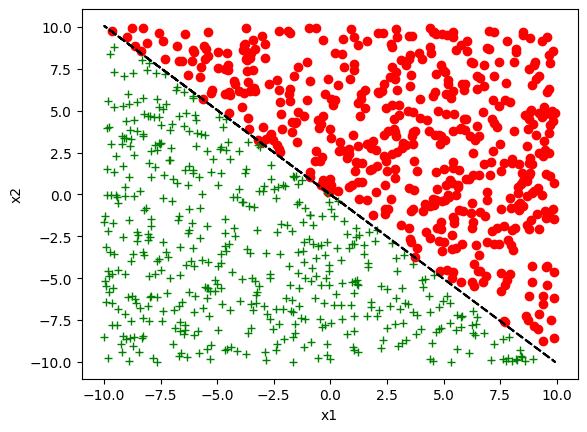

In [10]:
import perceptron
import numpy as np

def sigmoid(a):
    return 1 / (1 + np.exp(-a))

# get the dataset:
[x1, x2, t] = perceptron.get_simple_data()
#[x1, x2, t] = perceptron.get_difficult_data()

# starting parameters:
w1 = 0
w2 = 3
threshold = 0 # the threshold is 0, so this parameter does not have to be learned

# delta rule:
n_iterations = 100
n_samples = len(x1)
learning_rate = 0.01

for i in range(n_iterations):
    print(f'Iteration {i}')
    sum_err = 0
    
    for j in range(n_samples):
        # calculate output, gradient, and error:
        y = w1 * x1[j] + w2 * x2[j]
        y = sigmoid(y)
        
        gradient = y * (1 - y)
        
        error = y - t[j]
        
        # update weights:
        w1 -= learning_rate * gradient * error * x1[j]
        w2 -= learning_rate * gradient * error * x2[j]
        
        # keep track of the loss:
        sum_err += error*error
        
    print(f'Sum error = {sum_err}')

print(f'w1={w1}, w2  = {w2}, T = {threshold}')
# plot the data and the separation line:
perceptron.plot_data_line(x1, x2, t, w1, w2)

### Exercise 4 and 5

The code below is one way to implement the MLP learning (exercise 4), with stochastic gradient descent. Also, here the number of iterations, batch size and learning rate have been tuned to work quite well on all problems (exercise 5). 

Iteration 0
Sum error = 0.2493133109484902
Sum error = 0.2478536238522191
Sum error = 0.24807172936817068
Sum error = 0.26119098777959304
Sum error = 0.24990572965626348
Sum error = 0.2498111247086186
Sum error = 0.24529662545736822
Sum error = 0.2583231810880709
Sum error = 0.25019509591421907
Sum error = 0.24884280076662402
Sum error = 0.251099752576916
Sum error = 0.2500610461727726
Sum error = 0.24777368402445227
Sum error = 0.2536733316848827
Sum error = 0.2547745537168933
Sum error = 0.24810539152892455
Sum error = 0.24492408629206253
Sum error = 0.26015003719195895
Sum error = 0.24481577164706053
Sum error = 0.2490600557731232
Sum error = 0.2510839653263627
Sum error = 0.24878172382894256
Sum error = 0.24716246071489067
Sum error = 0.25257743349361816
Sum error = 0.2461656826991688
Sum error = 0.2560065584858415
Sum error = 0.24644629723791245
Sum error = 0.24903304670373508
Sum error = 0.24892539799792612
Sum error = 0.24675433766478055
Sum error = 0.2511449122264929
Sum error 

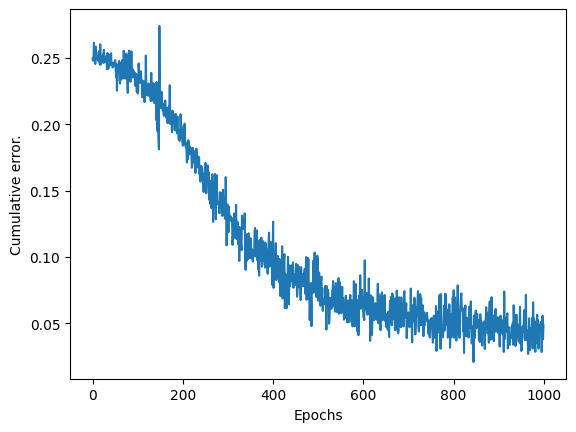

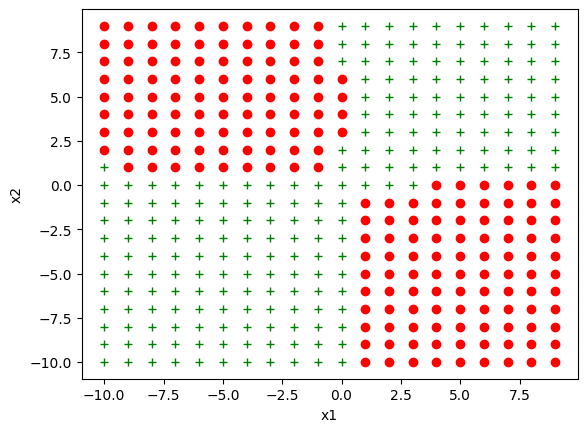

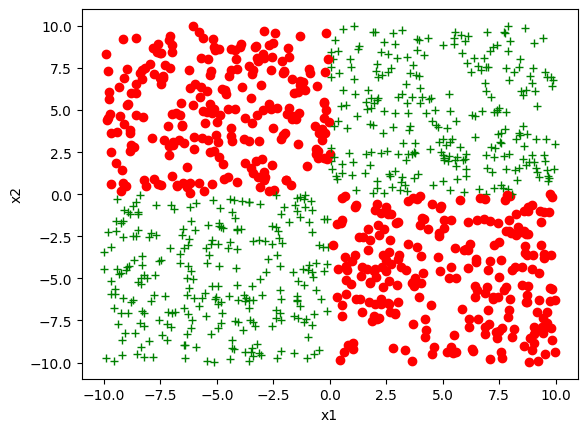

In [12]:
import perceptron
import numpy as np
from matplotlib import pyplot as plt

# get the dataset:
#[x1, x2, t] = perceptron.get_simple_data()
#[x1, x2, t] = perceptron.get_medium_data()
[x1, x2, t] = perceptron.get_difficult_data()
#[x1, x2, t] = perceptron.get_traditional_XOR_data()

# Tune the learning parameters:
n_iterations = 1000
batch_size = 50
learning_rate = 0.02


# create the weights for an MLP:
n_hidden_neurons = 20
np.random.seed(1)
bound_ih = 0.5
bound_ho = 1 / n_hidden_neurons
w_ih = bound_ih*2*(np.random.random([3,n_hidden_neurons])-0.5)
w_ho = bound_ho*2*(np.random.random([n_hidden_neurons+1, 1])-0.5)

# wrong weight initialization prevents learning: 
#large_number = 100
#w_ih = large_number * np.ones([3,n_hidden_neurons])
#w_ho = large_number * np.ones([n_hidden_neurons+1, 1])

inputs = np.ones([1,3])

n_samples = len(x1)
batch_size = np.min([batch_size, n_samples])
sum_errs = np.zeros([n_iterations, 1])

Weights = []

for i in range(n_iterations):

    if(i % (n_iterations/10) == 0):
        print(f'Iteration {i}')

    sum_err = 0

    samples = np.random.choice(n_samples, size=batch_size, replace = False)
    # print(f'First sample = {samples[0]}')

    d_w_ho = 0
    d_w_ih = 0

    for j in samples:
        # calculate output and hidden neuron activations:
        inputs[0,0:2] = [x1[j][0], x2[j][0]]
        [h,o] = perceptron.get_output_MLP(w_ih, w_ho, inputs)

        # calculate the gradients:
        error = o - t[j]
        gradient_ho = np.transpose(error * o * (1-o) * h)

        # How to adapt the weight of the bias? Shouldn' it be a different activation function?
        gradient_ih = error * o * (1-o) * w_ho * np.transpose(h) * (1-np.transpose(h))
        # are all values related to the right weights?
        gradient_ih = np.transpose(np.multiply(inputs, gradient_ih))
        gradient_ih = gradient_ih[:,:-1]

        # update weights:
        d_w_ho += learning_rate * gradient_ho
        d_w_ih += learning_rate * gradient_ih

        # # cross-checking:
        # w_ho -= learning_rate * gradient_ho
        # w_ih -= learning_rate * gradient_ih

        # [h_post, o_post] = get_output_MLP(w_ih, w_ho, inputs)
        # error_post = o_post - t[j] 

        # if(abs(error_post) >= abs(error)):
        #     print('Error got bigger?')
        # #print(f'Error before: {error}, error after: {error_post}.')

        # keep track of the loss:
        sum_err += error*error

    #print(d_w_ho)

    w_ho -= d_w_ho
    w_ih -= d_w_ih

    Weights.append((np.copy(w_ho), np.copy(w_ih)))

    sum_errs[i] = sum_err / batch_size
    print(f'Sum error = {sum_errs[i][0]}')

plt.figure()
plt.plot(sum_errs)
plt.xlabel('Epochs')
plt.ylabel('Cumulative error.')
    
# draw the output:
perceptron.draw_MLP(w_ih, w_ho, threshold = 0.5)

# draw how it should be:
perceptron.plot_data(x1, x2, t)

### Exercise 6 and 7

To answer the question on generalize beyond the limits, first learn the model and then run the code below. The quadratic function fits better outside the training range, since it has a more suitable <B>inductive bias</B> than the MLP for this specific problem.

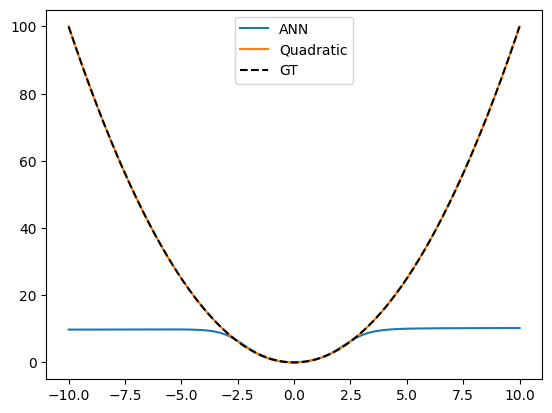

In [13]:
limit = 10
n_steps = 1000
x = torch.linspace(-limit, limit, n_steps)
x = torch.reshape(x, (n_steps, 1))
y = x**2

y_pred = model(x)
y_pred_q = q_model(x)

plt.figure()
plt.plot(x, y_pred.detach().numpy())
plt.plot(x, y_pred_q.detach().numpy())
plt.plot(x, y, 'k--')
plt.legend(['ANN', 'Quadratic', 'GT'])
